In [1]:
# Importing some basic Libraries

In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('termdeposit_train.csv')

In [94]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In this dataset we have 31647 entries and 18 columns

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


as we can see out of 18 cols 10 cols are object datatype and no null values are present 

In [96]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [2]:
# Dropping ID col because it has no use

In [97]:
df.drop("ID",axis=1,inplace=True)

In [98]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64


housing
yes    17584
no     14063
Name: count, dtype: int6

In [99]:
df.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

In [3]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder

In [100]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [101]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [102]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [103]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [4]:
# Creating distplot

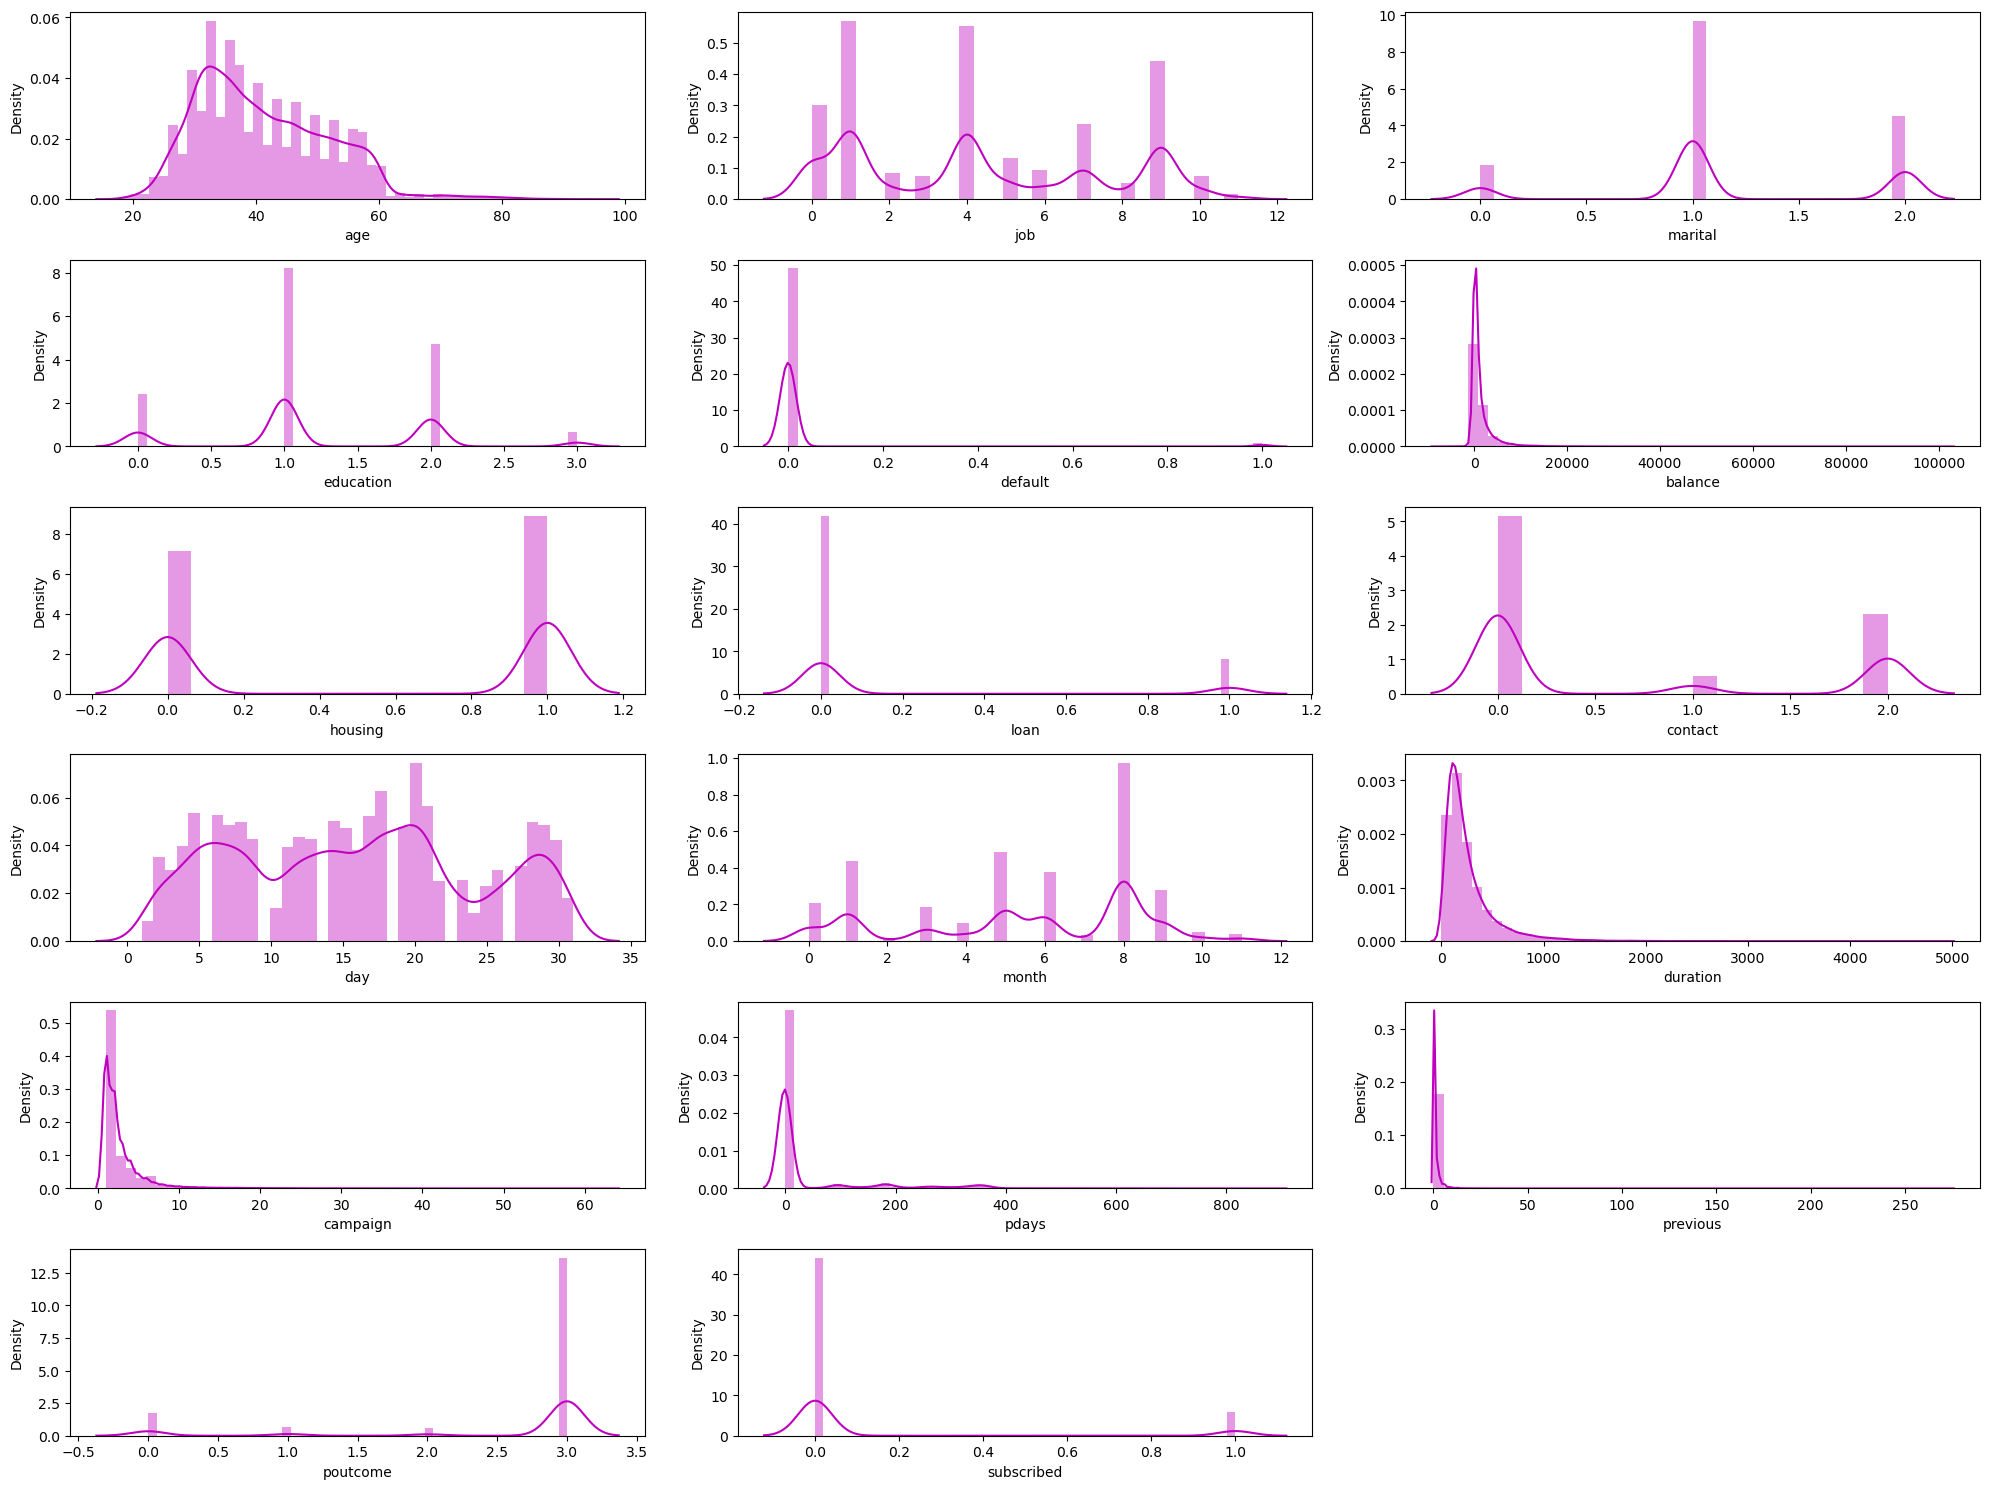

In [104]:
plt.figure(figsize=(20,15),facecolor='white')
p=1
for i in df.columns:
    if p<=19:
        ax=plt.subplot(6,3,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1

plt.tight_layout()

In [105]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

After checking the skewness we can say ['age', 'default', 'balance', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed'] these cols has skewness present

In [5]:
# Checking for all the skewed col by runnig a loop

In [106]:
skewed_col=[]
normal_col=[]
for i in df.columns:
    if (df[i].skew() > 0.5)or(df[i].skew() < -0.5):
        skewed_col.append(i)
    else:
        normal_col.append(i)

print(skewed_col)
print('\n')
print(normal_col)

['age', 'default', 'balance', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']


['job', 'marital', 'education', 'housing', 'day', 'month']


In [6]:
# Removing all the skewness by cuberoot technique

In [107]:
for i in skewed_col:
    df[i]=np.cbrt(df[i])

In [108]:
df.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.637383
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -2.386125
subscribed    2.377445
dtype: float64

In [7]:
# creating kdeplot to check the skewness 

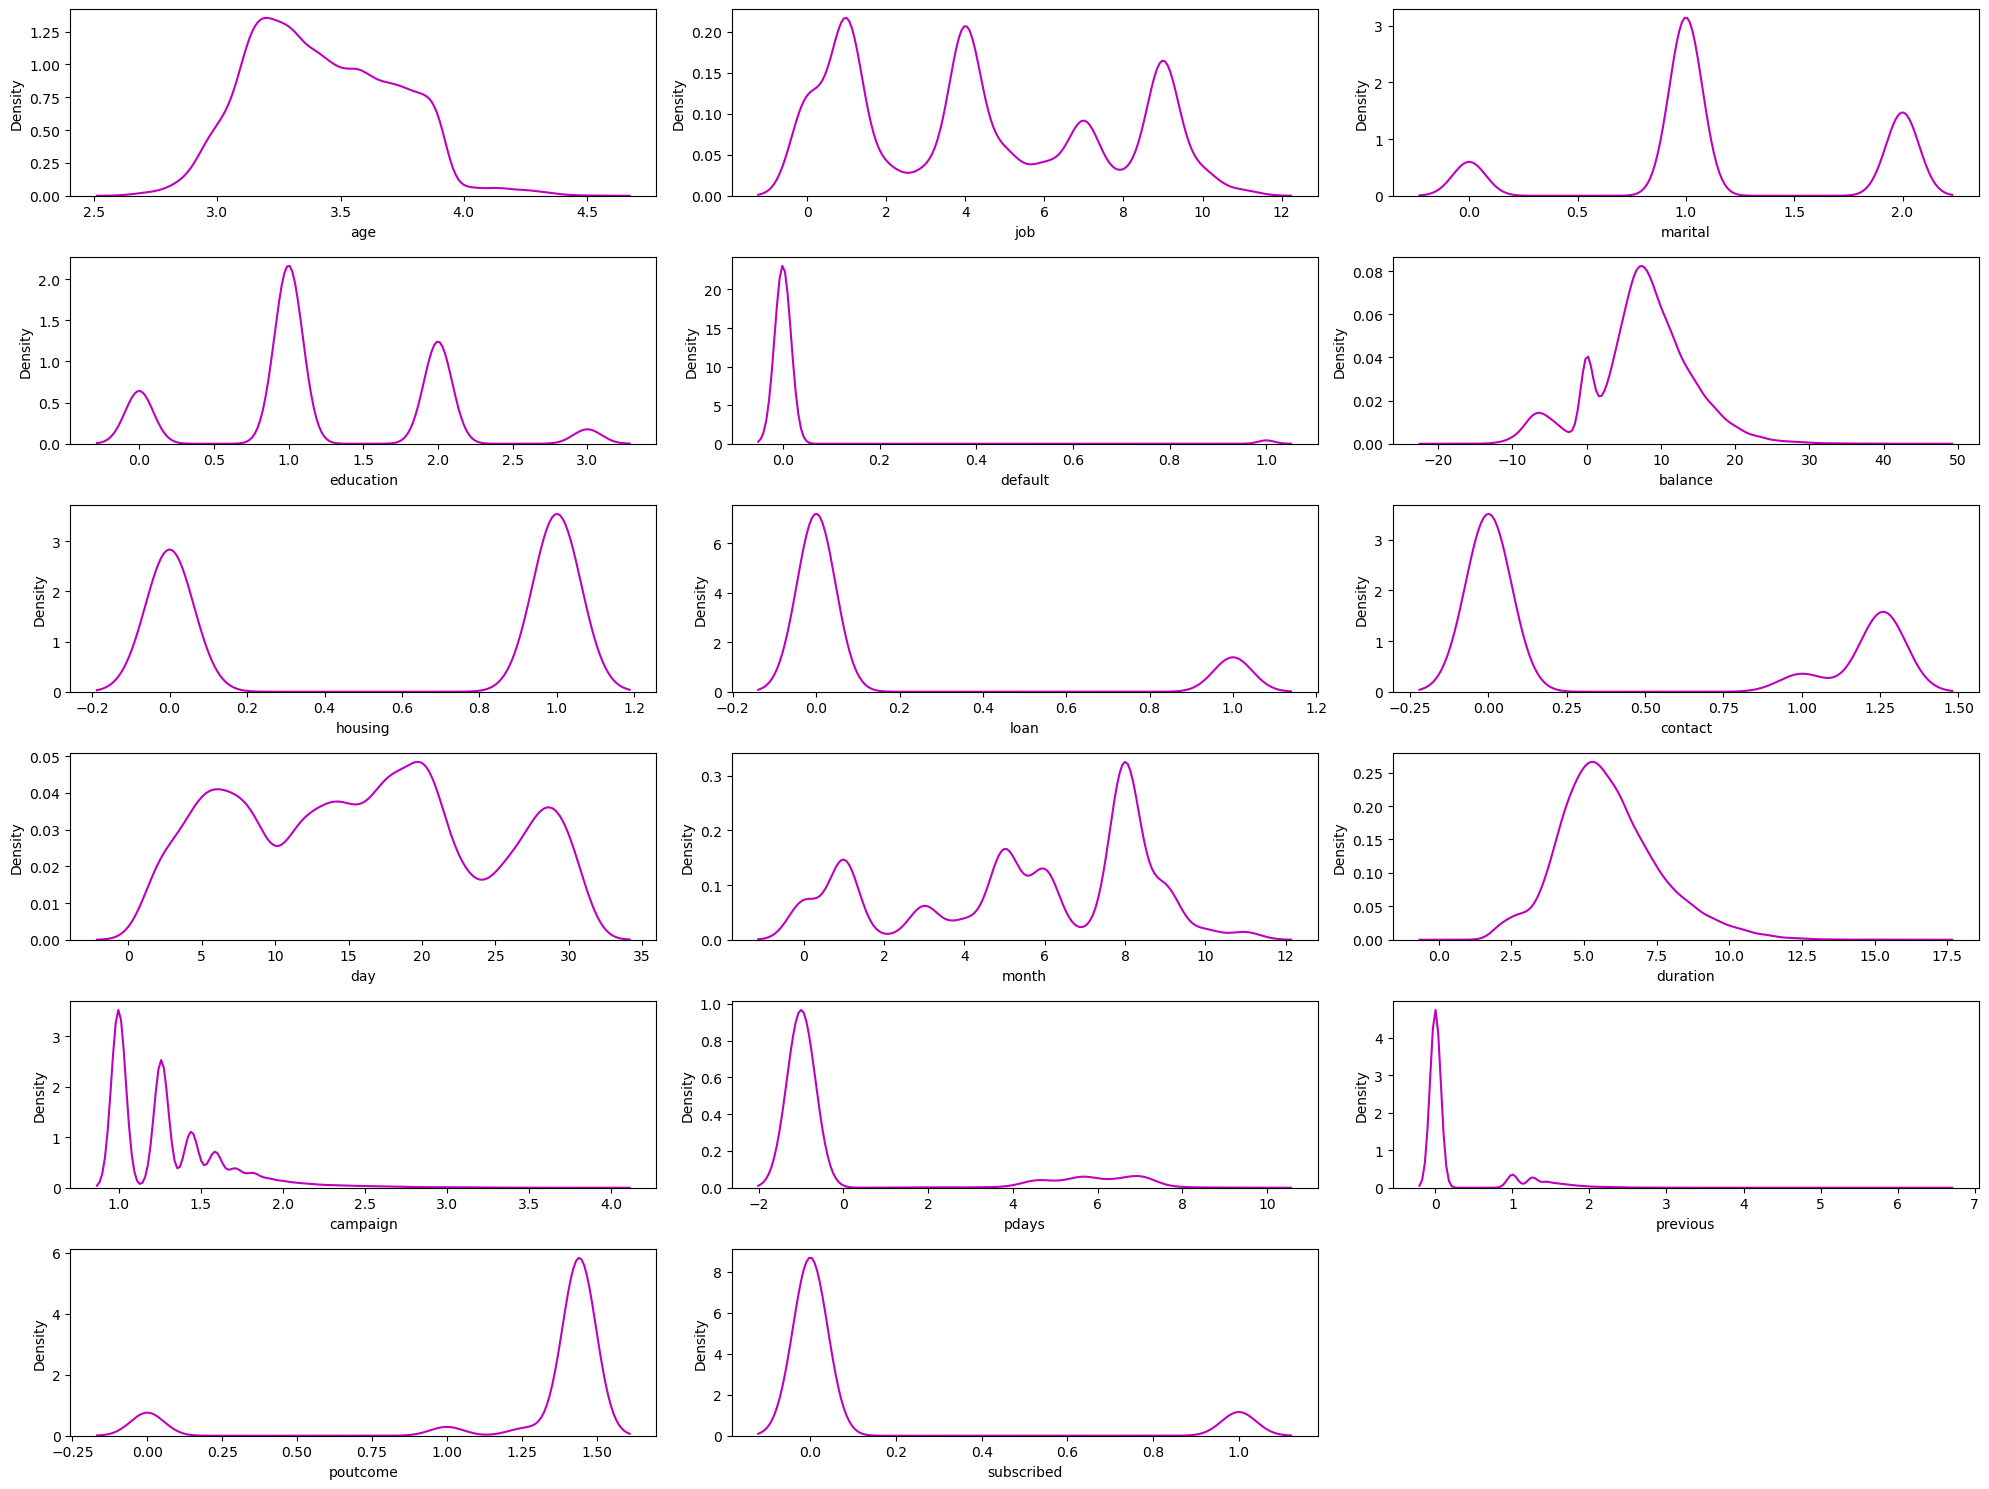

In [109]:
plt.figure(figsize=(20,15),facecolor='white')
p=1
for i in df.columns:
    if p<=19:
        ax=plt.subplot(6,3,p)
        sns.kdeplot(df[i],color='m')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1

plt.tight_layout()

In [8]:
# creating boxplot

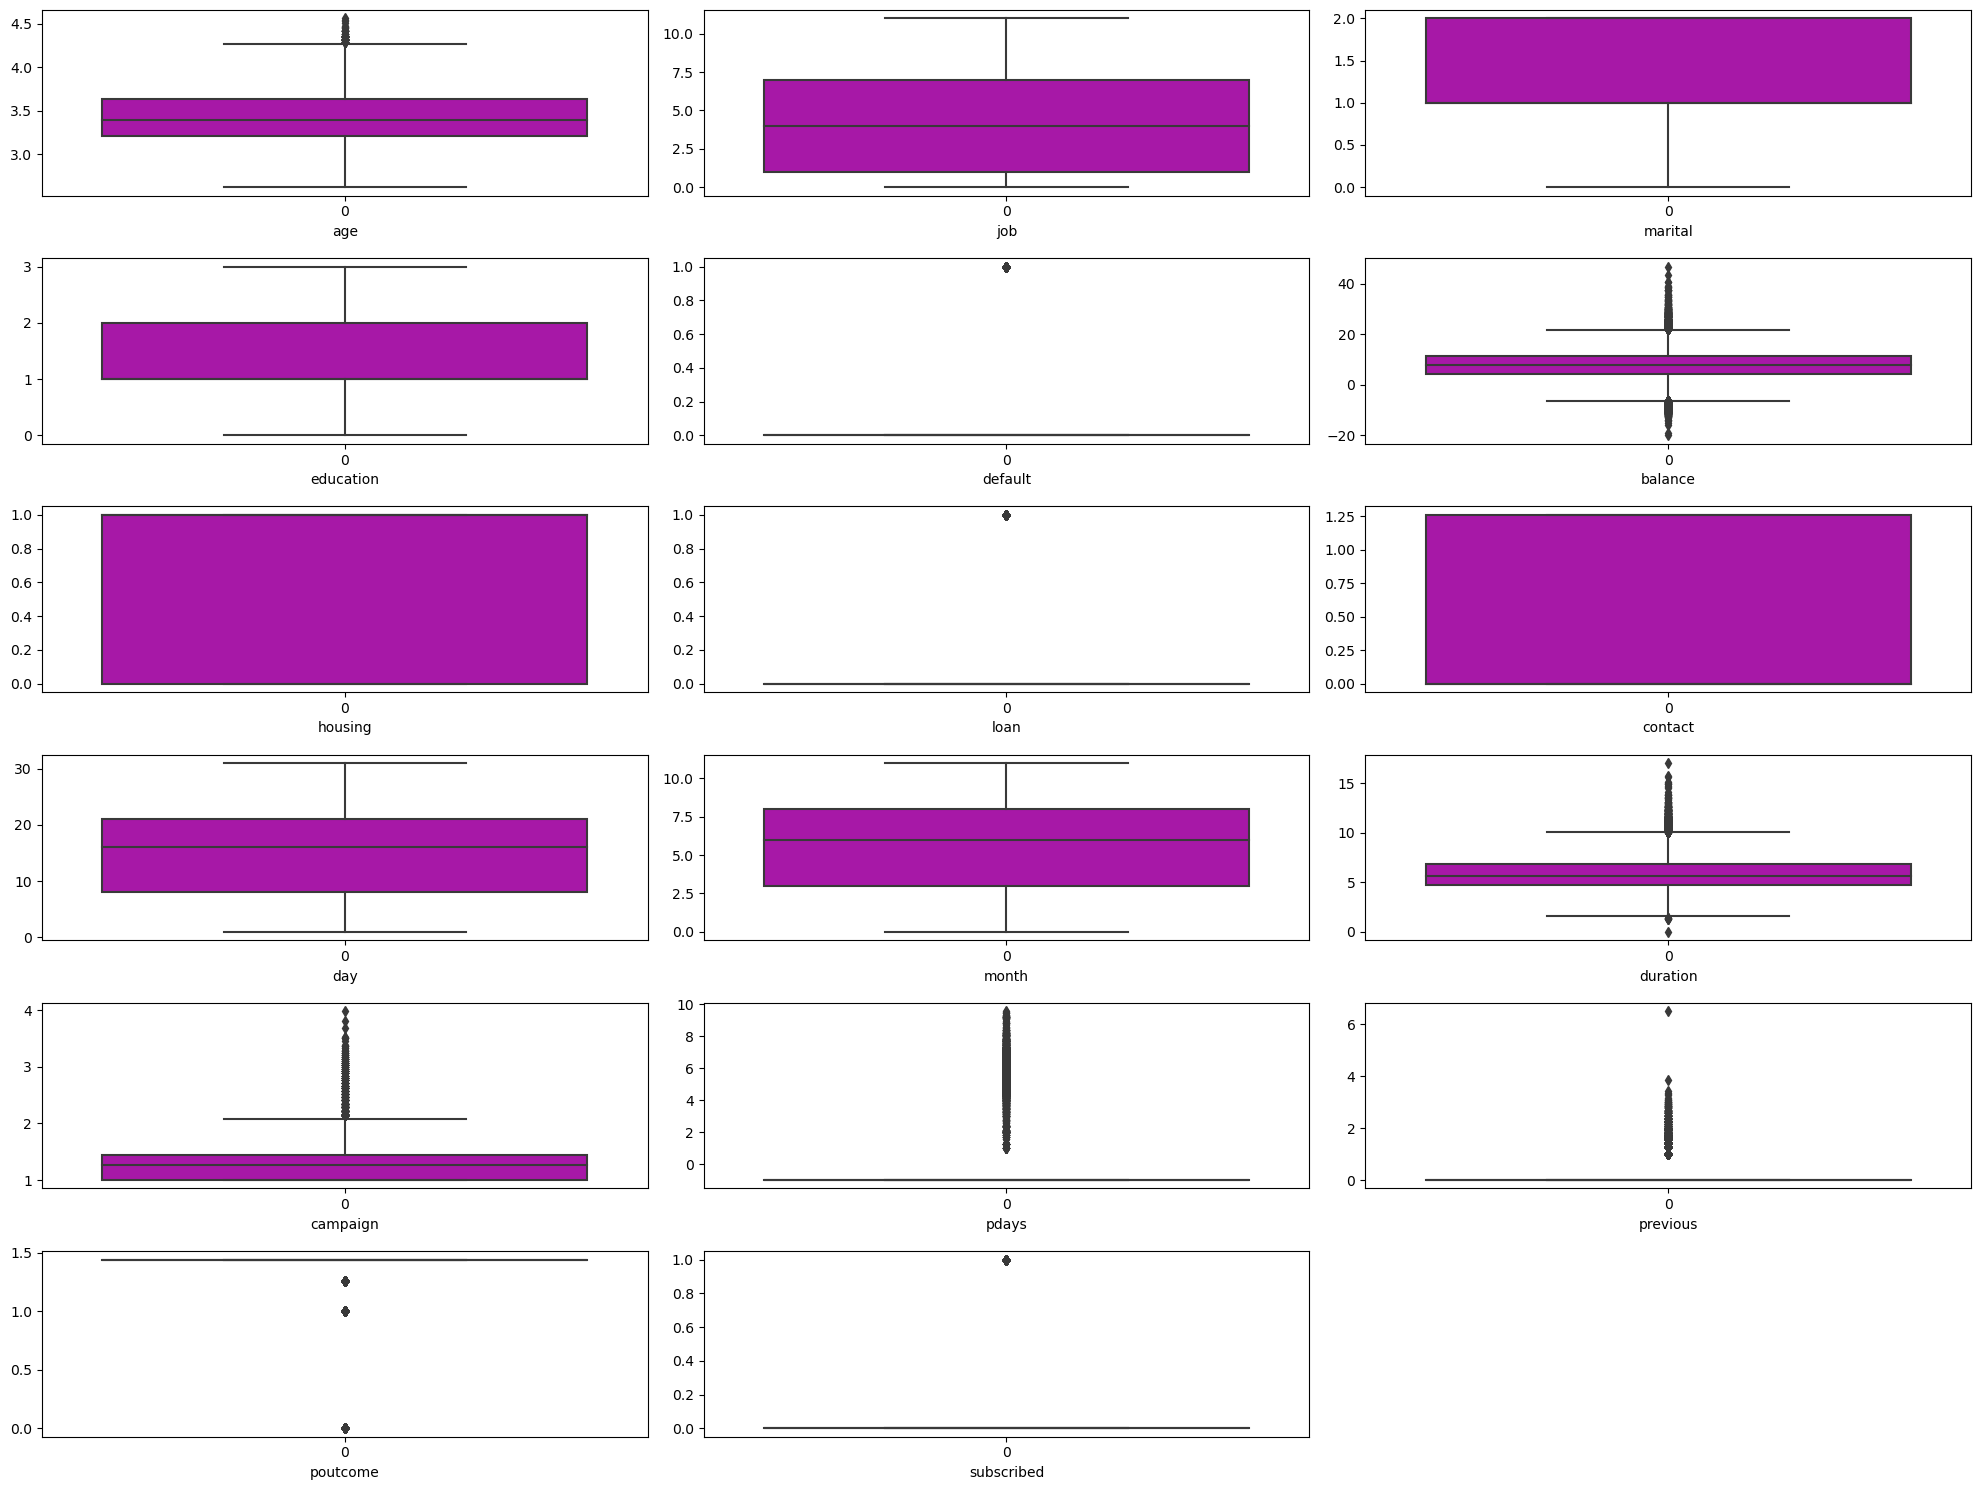

In [110]:
plt.figure(figsize=(20,15),facecolor='white')
p=1
for i in df.columns:
    if p<=19:
        ax=plt.subplot(6,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1

plt.tight_layout()

In [9]:
# Removing outliers by using zscore method

In [111]:
from scipy.stats import zscore

In [112]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [113]:
a=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

In [114]:
curr=df[a]

In [115]:
z=np.abs(zscore(curr))
df_new=df[(z<3).all(axis=1)]
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0.0,1.0,3.0,0.0,12.456918,0.0,0.0,1.000000,19,9.0,3.530348,1.259921,-1.000000,0.00000,1.442250,0.0
1,3.141381,11.0,1.0,1.0,0.0,1.442250,0.0,0.0,0.000000,20,5.0,4.497941,1.259921,-1.000000,0.00000,1.442250,0.0
2,3.000000,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.000000,18,5.0,6.214465,1.000000,-1.000000,0.00000,1.442250,0.0
3,3.848501,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.000000,22,6.0,9.535417,1.000000,4.379519,1.44225,1.259921,1.0
4,3.141381,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.000000,4,3.0,7.243156,1.000000,-1.000000,0.00000,1.442250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4.0,2.0,1.0,0.0,14.371032,0.0,0.0,1.259921,20,6.0,3.107233,1.587401,-1.000000,0.00000,1.442250,0.0
31641,3.332222,9.0,2.0,2.0,0.0,10.939057,0.0,0.0,1.259921,6,6.0,7.617412,1.259921,-1.000000,0.00000,1.442250,0.0
31642,3.072317,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.000000,12,8.0,4.876999,1.259921,-1.000000,0.00000,1.442250,0.0
31643,3.756286,4.0,0.0,2.0,0.0,7.243156,0.0,1.0,0.000000,5,6.0,7.594363,1.259921,-1.000000,0.00000,1.442250,1.0


After removing the outliers we have 29464 entries from 31647 entries

In [116]:
df=df_new

In [10]:
# checking the correlations

In [118]:
cor=df.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.029108,-0.425733,-0.100022,NaN,0.088413,-0.159993,-0.002515,0.055940,-0.008074,-0.043759,-0.022008,0.039100,-0.018271,-0.009692,0.011275,0.001594
job,-0.029108,1.000000,0.067348,0.172470,NaN,0.028599,-0.126375,-0.036369,-0.075613,0.020541,-0.089231,-0.003216,0.007086,-0.006731,0.001946,0.007913,0.037247
marital,-0.425733,0.067348,1.000000,0.112067,NaN,0.032918,-0.020787,-0.042378,-0.043822,-0.007807,-0.001769,0.012883,-0.027213,0.028140,0.029117,-0.015370,0.049176
education,-0.100022,0.172470,0.112067,1.000000,NaN,0.073411,-0.100200,-0.045291,-0.116711,0.018320,-0.056258,0.004182,-0.010546,0.023442,0.034451,-0.013823,0.071965
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.088413,0.028599,0.032918,0.073411,NaN,1.000000,-0.083129,-0.131080,-0.038135,-0.006719,-0.001457,0.032150,-0.022052,0.053866,0.063869,-0.041119,0.096666
housing,-0.159993,-0.126375,-0.020787,-0.100200,NaN,-0.083129,1.000000,0.040221,0.177155,-0.019057,0.273697,0.005957,-0.043746,0.079812,0.050485,-0.100300,-0.146824
loan,-0.002515,-0.036369,-0.042378,-0.045291,NaN,-0.131080,0.040221,1.000000,-0.009686,0.012572,0.025871,-0.006037,0.001058,-0.021841,-0.023553,0.001259,-0.071339
contact,0.055940,-0.075613,-0.043822,-0.116711,NaN,-0.038135,0.177155,-0.009686,1.000000,-0.015606,0.357589,-0.044325,0.014645,-0.270834,-0.267628,0.237265,-0.148188
day,-0.008074,0.020541,-0.007807,0.018320,NaN,-0.006719,-0.019057,0.012572,-0.015606,1.000000,0.010042,-0.037916,0.130057,-0.077088,-0.071275,0.066132,-0.026276


In [11]:
# plotting heatmap for better visualization of the correlation values

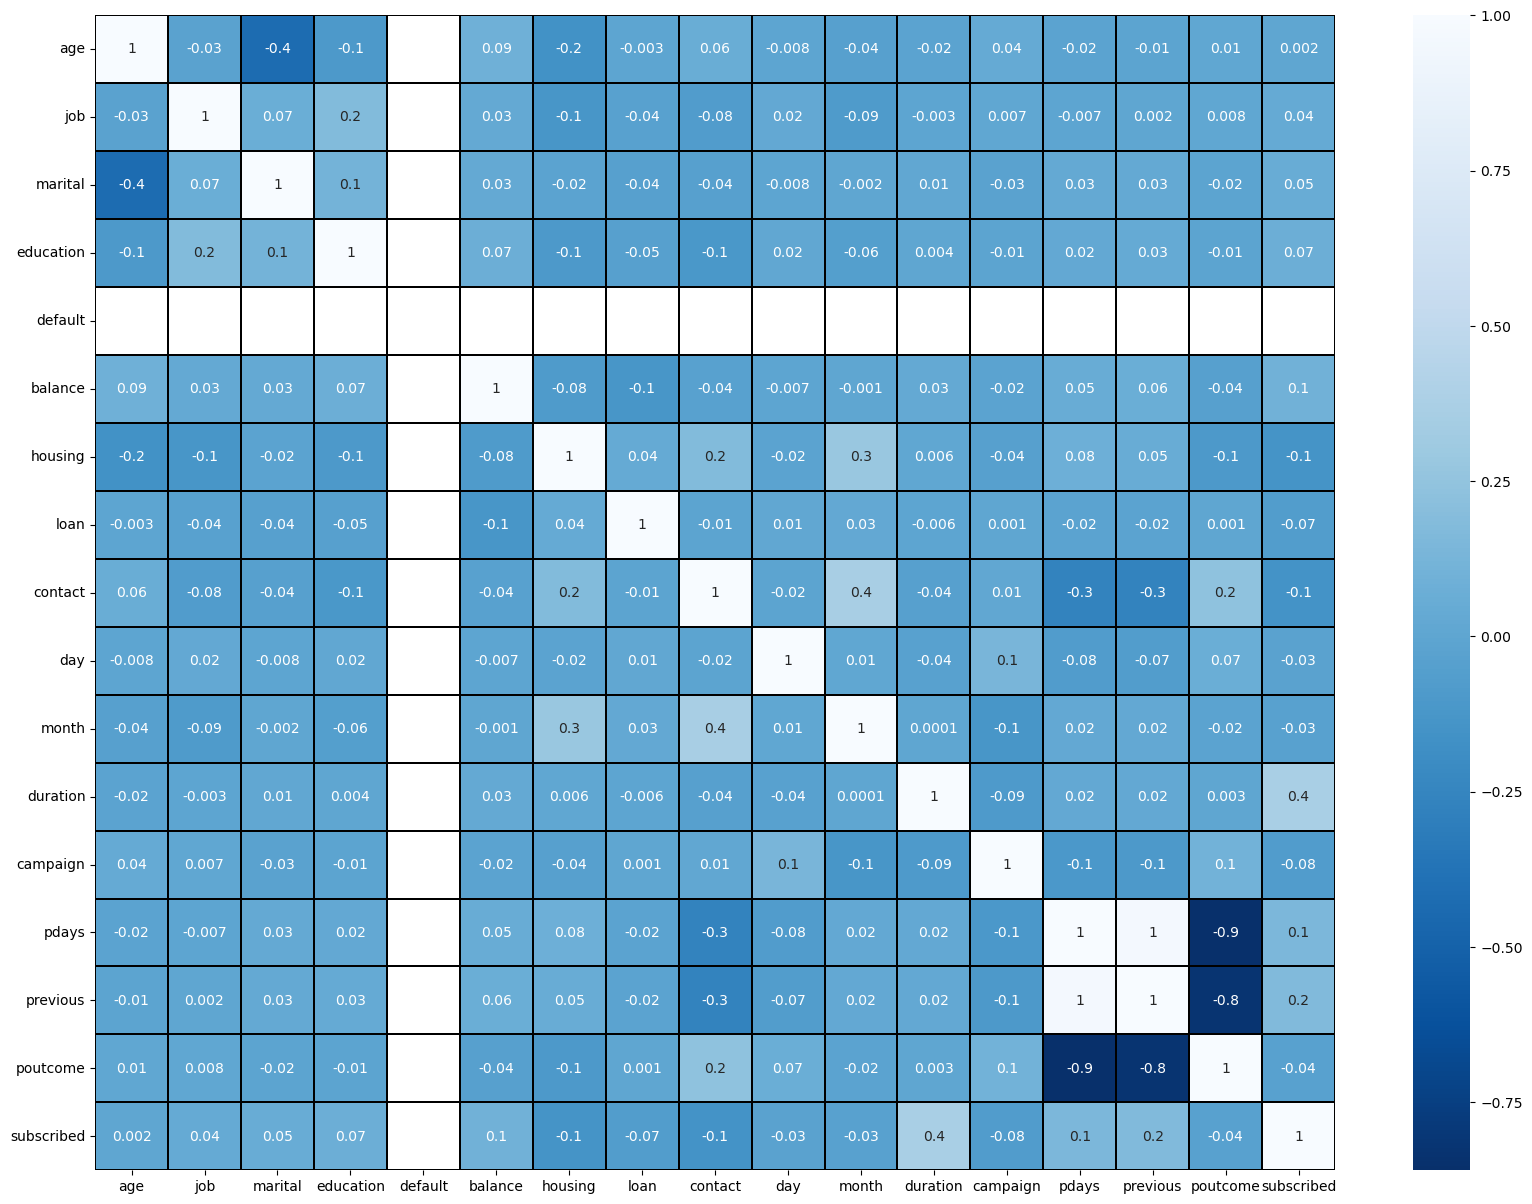

In [119]:
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths=.1,fmt='.1g',linecolor='black',annot=True,cmap="Blues_r")
plt.show()

In [121]:
cor['subscribed'].sort_values(ascending=False).to_frame()

,subscribed
subscribed,1.000000
duration,0.362747
previous,0.169923
pdays,0.149201
balance,0.096666
education,0.071965
marital,0.049176
job,0.037247
age,0.001594
day,-0.026276


Age col has very less correlation and duration col has moderate positive correlation with the target variable

In [12]:
# checking for the multicolineraity by variance_inflation_factor

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
# splitting our dataset into X & Y

In [123]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [124]:
ds=pd.DataFrame()
ds['col']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,col,vif
0,age,52.943156
1,job,2.864131
2,marital,4.701805
3,education,3.853172
4,default,NaN
5,balance,2.538568
6,housing,2.521097
7,loan,1.214737
8,contact,2.012893
9,day,4.678753


In [14]:
# age col has very high multicolinearity with the other cols so this col can be droped

In [15]:
# creating the regplot

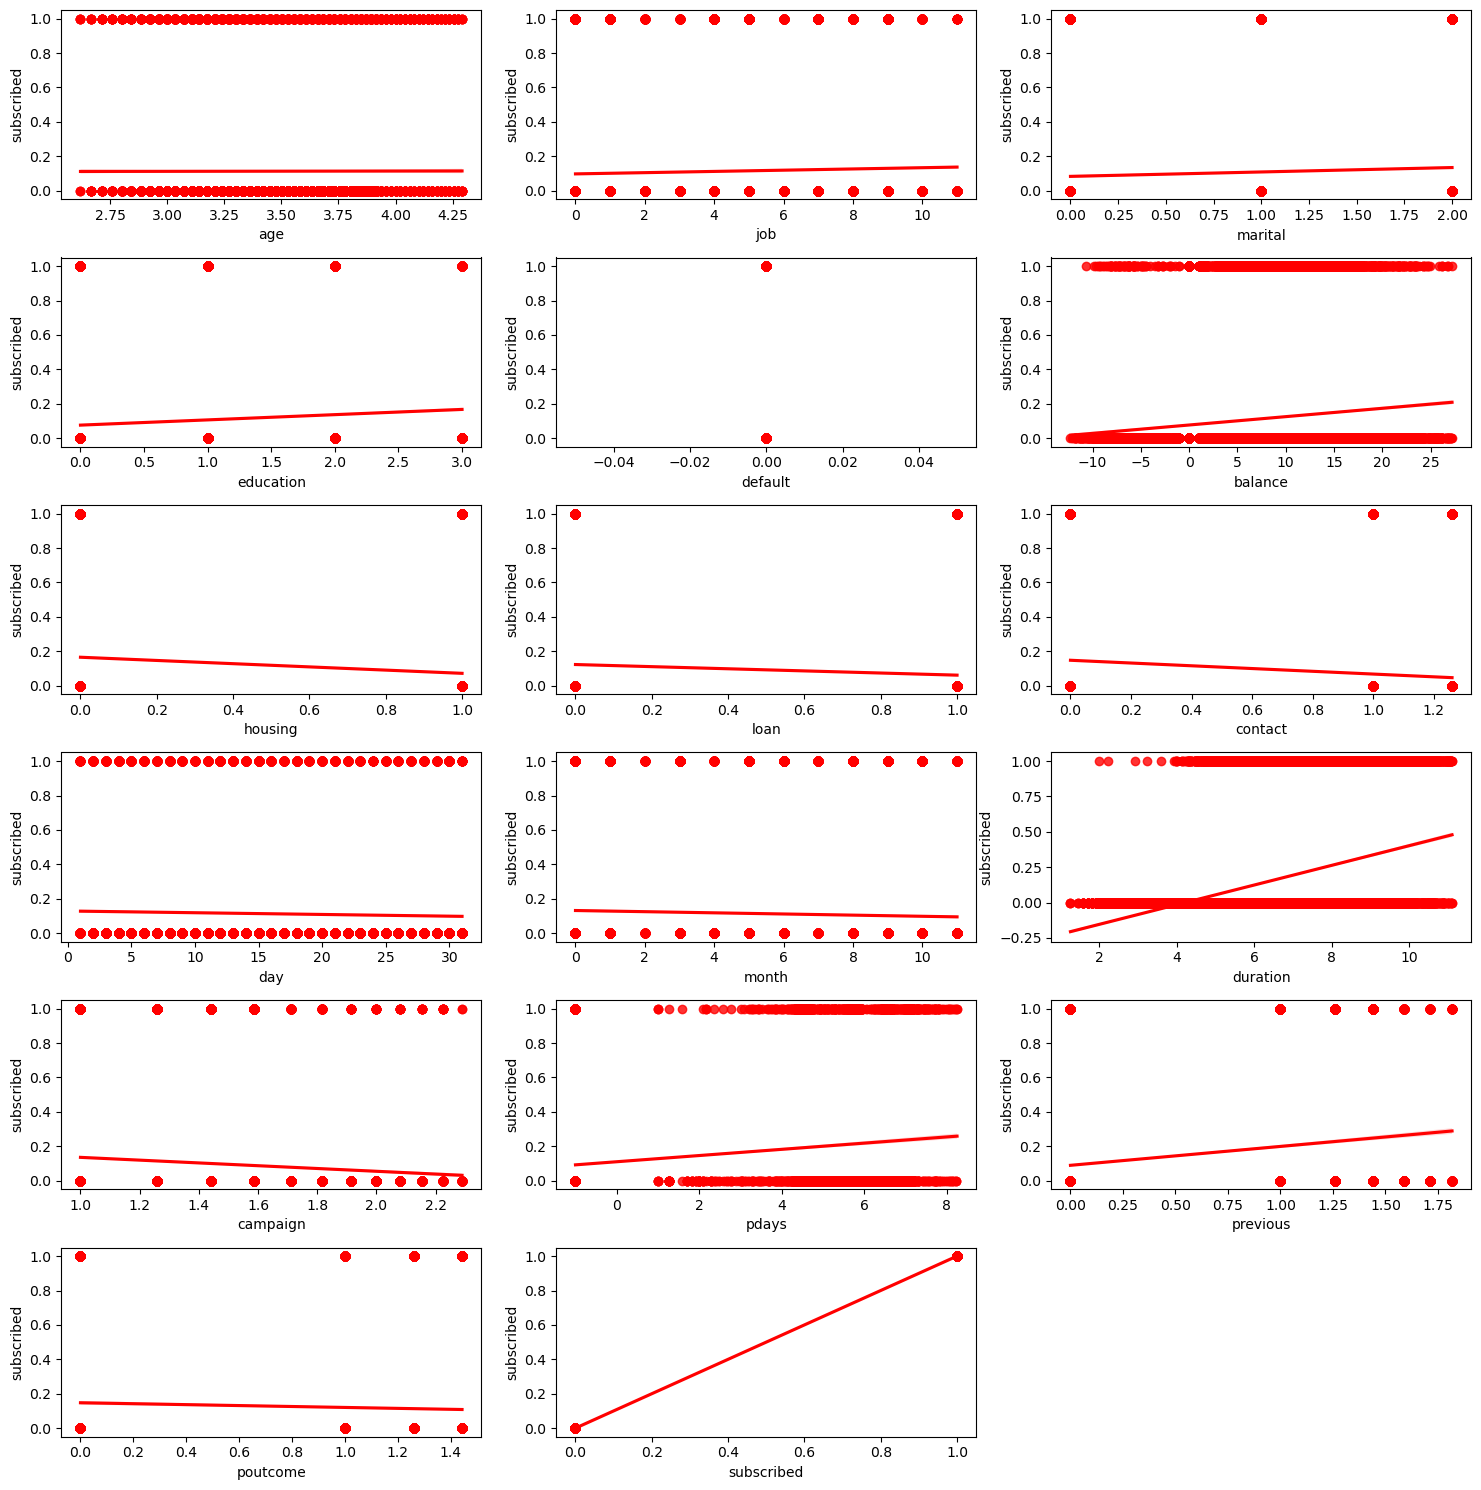

In [128]:
plt.figure(figsize=(15,15),facecolor='white')
p=1
for i in df.columns:
    if p<=19:
        ax=plt.subplot(6,3,p)
        sns.regplot(x=i,y='subscribed',data=df,color='r')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1

plt.tight_layout()

In [16]:
# balancing the dataset by using SMOTE technique

In [129]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [130]:
y1.value_counts()

subscribed
0.0    26140
1.0    26140
Name: count, dtype: int64

Now we have equal entries for both of the classes in the target variable

In [17]:
# using standard scaling method to convert our dataset into normal distribution ( mean = 0 & std = 1)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x.columns)
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.390786,-1.402360,-0.358490,2.436358,0.0,0.689855,-0.983248,-0.393692,1.305345,0.440260,1.127095,-1.690565,0.041532,-0.562471,-0.560067,0.440244
1,-0.944837,2.031079,-0.358490,-0.409217,0.0,-1.127093,-0.983248,-0.393692,-0.622279,0.560010,-0.134462,-1.153157,0.041532,-0.562471,-0.560067,0.440244
2,-1.427263,0.782556,-0.358490,-0.409217,0.0,0.222315,1.119071,-0.393692,-0.622279,0.320509,-0.134462,-0.199786,-0.938370,-0.562471,-0.560067,0.440244
3,1.468035,-0.153837,-2.071450,1.013570,0.0,1.087660,-0.983248,-0.393692,-0.622279,0.799512,0.180927,1.644696,-0.938370,1.297365,1.990070,0.006842
4,-0.944837,1.406817,-0.358490,-0.409217,0.0,-0.553630,1.119071,-0.393692,-0.622279,-1.355999,-0.765241,0.371557,-0.938370,-0.562471,-0.560067,0.440244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52275,-0.156037,1.406817,0.248417,-0.409217,0.0,0.221455,-0.983248,0.732114,-0.622279,-0.996747,-0.134462,1.002796,-0.305650,-0.562471,-0.560067,0.440244
52276,1.317776,-0.153837,-1.590715,2.037059,0.0,0.959317,-0.983248,-0.393692,-0.622279,-0.038743,1.757874,0.154599,-0.938370,1.359628,2.330601,-0.437606
52277,-0.216450,-0.343575,-0.358490,1.446013,0.0,-0.543151,-0.344269,-0.393692,-0.622279,1.757516,-0.134462,1.323324,0.900888,-0.562471,-0.560067,0.440244
52278,-0.406066,-1.117066,-0.505767,-1.709676,0.0,-0.167212,1.119071,-0.393692,-0.413469,-1.355999,0.757473,2.264986,-0.938370,-0.562471,-0.560067,0.440244


In [19]:
# Importing some basic classification models and metrices

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
# checking for the best random_state value

In [134]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    RFC=RandomForestClassifier(n_jobs=-1)
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best acc :',maxacc,  'random_state :',maxrs) 

best acc : 0.9581101759755164 random_state : 172


so here as we can see for random_state = 172, we have best best accuracy

In [21]:
# splitting our dataset based on the best random_state value

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [136]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(41824, 16) (41824,) (10456, 16) (10456,)


In [22]:
# Importing some classification algorithms

In [137]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [23]:
# making their instances

In [138]:
RFC=RandomForestClassifier()
ET=ExtraTreesClassifier()
LR=LogisticRegression()
svc=SVC()
GBC=GradientBoostingClassifier()
ADC=AdaBoostClassifier()
BC=BaggingClassifier()
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
MNB=MultinomialNB()
GNB=GaussianNB()

In [24]:
# creating a list of all instances named loop

In [139]:
loop = [RFC,ET,LR,svc,GBC,ADC,BC,DTC,KNN,GNB]

In [25]:
# Importing auc_roc_score

In [140]:
from sklearn.metrics import roc_auc_score

In [26]:
# Runnig a loop for all selected algorithmns and comparing their cross_val_score with their accuracies

In [142]:
for i in loop:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('This is for :',i)
    print('accuracy will be :',accuracy_score(y_test,pred))
    print('confusion matrix will be :','\n')
    print(confusion_matrix(y_test,pred))
    print('classification report will be :','\n')
    print(classification_report(y_test,pred))
    
    score= cross_val_score(i,x,y,cv=10,scoring='roc_auc')
    print('Cross val score will be :',score)
    print('Mean cv :',score.mean())
    print('Difference between cv and accuracy_score will be :',accuracy_score(y_test,pred)-score.mean())
    print('\n')
    
    

This is for : RandomForestClassifier()
accuracy will be : 0.9570581484315226
confusion matrix will be : 

[[4960  231]
 [ 218 5047]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      5191
         1.0       0.96      0.96      0.96      5265

    accuracy                           0.96     10456
   macro avg       0.96      0.96      0.96     10456
weighted avg       0.96      0.96      0.96     10456

Cross val score will be : [0.92807498 0.92563317 0.93893415 0.91732666 0.90944612 0.9170425
 0.92835036 0.93067968 0.92508654 0.9212097 ]
Mean cv : 0.9241783862083155
Difference between cv and accuracy_score will be : 0.0328797622232071


This is for : ExtraTreesClassifier()
accuracy will be : 0.9639441469013007
confusion matrix will be : 

[[4942  249]
 [ 128 5137]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96    

So ExtraTrees model is the best model. Because mean cross_val_score is 0.92 and roc_auc_score is 0.9639

In [27]:
# Importing Grid search CV for Hyper parameter tuning

In [143]:
from sklearn.model_selection import GridSearchCV

In [28]:
# selecting all the parameters to check which parameters is the best

In [144]:
parameters = {'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'n_jobs':[-1],'max_leaf_nodes':[2,4,5,None],'max_depth':[2,3,4,5,None]}

In [146]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)

In [147]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_leaf_nodes': [2, 4, 5, None],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]})

In [148]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 200,
 'n_jobs': -1}

So these are the best parameters 

In [29]:
# Creating our final model based on the best parameters

In [149]:
final_model = ExtraTreesClassifier(criterion = "entropy",max_depth=None,max_leaf_nodes=None,n_estimators=200,n_jobs=-1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.6335118592196


In [30]:
# Plotting Ruc_curve

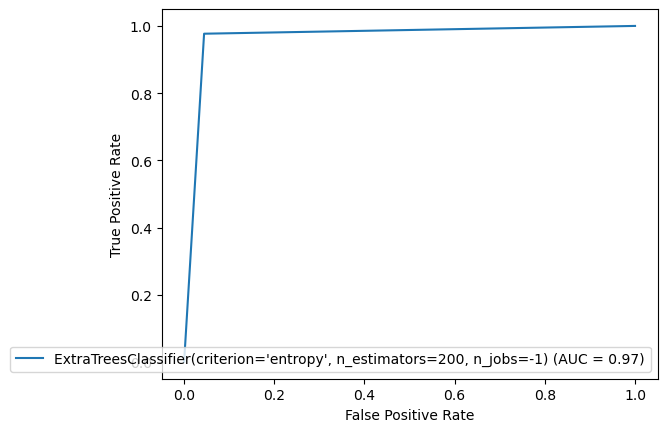

In [150]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [151]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,pred)
auc_score

0.9662603274752506

roc_auc_score is 0.96626

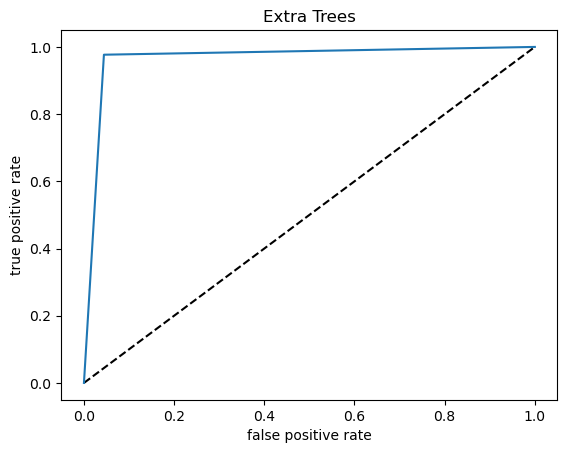

In [152]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Extra Trees')
plt.show()

In [31]:
# saving our model

In [162]:
import joblib
filename = 'bank_marketing_model.pkl'
joblib.dump(final_model, filename)
#model = joblib.load(filename)


['bank_marketing_model.pkl']

In [32]:
# Lets Test our model for the given test dataset

In [201]:
test_df=pd.read_csv('termdeposit_test.csv')

In [202]:
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


We have 13564 entries and 17 cols 

In [203]:
from sklearn.preprocessing import OrdinalEncoder
ORE=OrdinalEncoder()

In [33]:
# Dropping ID col

In [204]:
test_df.drop("ID",axis=1,inplace=True)

In [34]:
# converting the datatypes into the numeric datatype from object type

In [205]:
for i in test_df.columns:
    if test_df.dtypes[i] == 'object':
        test_df[i]=ORE.fit_transform(test_df[i].values.reshape(-1,1))

In [206]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [207]:
test_df.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

In [35]:
# selecting the skewed columns of having skewness value of greater than 0.5 for both side

In [208]:
skewed=[]
not_skew=[]
for i in test_df.columns:
    if (test_df[i].skew() > 0.5)or(test_df[i].skew() < -0.5):
        skewed.append(i)
    else:
        not_skew.append(i)

print(skewed)
print('\n')
print(not_skew)

['age', 'default', 'balance', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


['job', 'marital', 'education', 'housing', 'day', 'month']


In [36]:
# removing the skewness by cuberoot technique

In [209]:
for i in skewed:
    test_df[i]=np.cbrt(test_df[i])

In [210]:
test_df.skew()

age          0.286833
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance     -0.059591
housing     -0.226771
loan         1.898587
contact      0.674128
day          0.106806
month       -0.465848
duration     0.624285
campaign     1.618080
pdays        1.722786
previous     2.005334
poutcome    -2.282264
dtype: float64

In [37]:
# using standard scaling technique

In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_df_n = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)
test_df_n

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.841679,0.807551,-0.276592,-0.301053,-0.131336,-0.388757,0.893033,-0.429564,-0.724614,-0.089124,0.829938,-1.770139,1.476242,-0.471159,-0.458201,0.409494
1,2.924132,0.196760,-1.914173,-1.642982,-0.131336,1.009579,-1.119779,-0.429564,0.999448,-1.778340,-0.165753,0.760054,-0.876872,-0.471159,-0.458201,0.409494
2,-0.956319,0.502156,1.360988,1.040875,-0.131336,-0.337414,0.893033,-0.429564,1.447568,0.031534,0.829938,1.655383,-0.876872,-0.471159,-0.458201,0.409494
3,1.469209,0.807551,1.360988,-1.642982,-0.131336,1.238460,0.893033,-0.429564,0.999448,-0.330440,0.829938,-1.031965,-0.128360,-0.471159,-0.458201,0.409494
4,0.468951,-1.024823,-1.914173,-0.301053,-0.131336,-2.494370,-1.119779,2.327941,1.447568,-1.537023,-0.165753,-0.588278,-0.876872,-0.471159,-0.458201,0.409494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.099363,-0.108636,-0.276592,1.040875,-0.131336,-0.594357,-1.119779,-0.429564,-0.724614,1.479434,-1.493340,-0.314959,0.814705,-0.471159,-0.458201,0.409494
13560,1.233427,-1.024823,-0.276592,-1.642982,-0.131336,0.870912,0.893033,-0.429564,1.447568,0.514168,0.166144,-0.249100,-0.876872,-0.471159,-0.458201,0.409494
13561,-0.511478,0.196760,-0.276592,-1.642982,-0.131336,-0.133128,0.893033,-0.429564,-0.724614,1.600092,-0.497650,-0.398032,-0.876872,-0.471159,-0.458201,0.409494
13562,-1.193218,-1.330219,1.360988,-0.301053,-0.131336,0.043941,-1.119779,-0.429564,-0.724614,-0.813073,1.161835,0.044106,-0.128360,1.540335,2.140126,0.011492


In [213]:
test_df=test_df_n

In [38]:
# Lets do the prediction 

In [214]:
pred = final_model.predict(test_df)

In [215]:
test_df['PRED']=pred
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,PRED
0,-0.841679,0.807551,-0.276592,-0.301053,-0.131336,-0.388757,0.893033,-0.429564,-0.724614,-0.089124,0.829938,-1.770139,1.476242,-0.471159,-0.458201,0.409494,1.0
1,2.924132,0.196760,-1.914173,-1.642982,-0.131336,1.009579,-1.119779,-0.429564,0.999448,-1.778340,-0.165753,0.760054,-0.876872,-0.471159,-0.458201,0.409494,1.0
2,-0.956319,0.502156,1.360988,1.040875,-0.131336,-0.337414,0.893033,-0.429564,1.447568,0.031534,0.829938,1.655383,-0.876872,-0.471159,-0.458201,0.409494,1.0
3,1.469209,0.807551,1.360988,-1.642982,-0.131336,1.238460,0.893033,-0.429564,0.999448,-0.330440,0.829938,-1.031965,-0.128360,-0.471159,-0.458201,0.409494,1.0
4,0.468951,-1.024823,-1.914173,-0.301053,-0.131336,-2.494370,-1.119779,2.327941,1.447568,-1.537023,-0.165753,-0.588278,-0.876872,-0.471159,-0.458201,0.409494,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.099363,-0.108636,-0.276592,1.040875,-0.131336,-0.594357,-1.119779,-0.429564,-0.724614,1.479434,-1.493340,-0.314959,0.814705,-0.471159,-0.458201,0.409494,1.0
13560,1.233427,-1.024823,-0.276592,-1.642982,-0.131336,0.870912,0.893033,-0.429564,1.447568,0.514168,0.166144,-0.249100,-0.876872,-0.471159,-0.458201,0.409494,1.0
13561,-0.511478,0.196760,-0.276592,-1.642982,-0.131336,-0.133128,0.893033,-0.429564,-0.724614,1.600092,-0.497650,-0.398032,-0.876872,-0.471159,-0.458201,0.409494,1.0
13562,-1.193218,-1.330219,1.360988,-0.301053,-0.131336,0.043941,-1.119779,-0.429564,-0.724614,-0.813073,1.161835,0.044106,-0.128360,1.540335,2.140126,0.011492,1.0


In [216]:
test_df['PRED'].value_counts()

PRED
1.0    12429
0.0     1135
Name: count, dtype: int64

In [217]:
test_dataset= pd.read_csv('termdeposit_test.csv')

In [219]:
test_dataset['PREDICTION']=pred
test_dataset

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,PREDICTION
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,1.0
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,1.0
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,1.0
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,1.0
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,1.0
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,1.0
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,1.0
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,1.0
